# 3.3.3 Ejemplo: inferencia de un escalar desconocido

**Propósito:** $\;$ predicción de un escalar $z$ a partir de $N$ medidas $\,\boldsymbol{y}=(y_1,\dotsc,y_N)\,$ realizadas con un ruido de precisión fija $\,\lambda_y=1/\sigma^2$

**Sistema Gaussiano lineal:** $\;$ con $\,\boldsymbol{b}=\boldsymbol{0}$
$$\begin{align*}
p(\boldsymbol{z})%
&=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_z,\mathbf{\Sigma}_z)
&\to&&p(z)%
&=\mathcal{N}(z\mid\mu_0,\lambda_0^{-1})\\[3mm]
p(\boldsymbol{y}\mid\boldsymbol{z})%
&=\mathcal{N}(\boldsymbol{y}\mid\mathbf{W}\boldsymbol{z},\mathbf{\Sigma}_y)%
&\to&&p(\boldsymbol{y}\mid z)%
&=\mathcal{N}(\boldsymbol{y}\mid\boldsymbol{1}_Nz,\operatorname{diag}(\lambda_y^{-1}\mathbf{I}))
\end{align*}$$

**Regla de Bayes (posterior):**
$$\begin{align*}
p(\boldsymbol{z}\mid\boldsymbol{y})%
&=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_{z|y},\mathbf{\Sigma}_{z|y})%
\quad\text{con}\quad%
\mathbf{\Sigma}_{z|y}^{-1}=\mathbf{\Sigma}_z^{-1}+\mathbf{W}^t\mathbf{\Sigma}_y^{-1}\mathbf{W}%
\quad\text{y}\quad%
\boldsymbol{\mu}_{z|y}=\mathbf{\Sigma}_{z|y}\,[\mathbf{W}^t\mathbf{\Sigma}_y^{-1}\boldsymbol{y}+\mathbf{\Sigma}_z^{-1}\boldsymbol{\mu}_z]\\[3mm]
p(z\mid\boldsymbol{y})%
&=\mathcal{N}(z\mid\mu_N,\lambda_N^{-1})%
\quad\text{con}\quad%
\lambda_N=\lambda_0+N\lambda_y%
\quad\text{y}\quad%
\mu_N=\frac{N\lambda_y\bar{y}+\lambda_0\mu_0}{\lambda_N}%
=\frac{N\lambda_y}{N\lambda_y+\lambda_0}\bar{y}+\frac{\lambda_0}{N\lambda_y+\lambda_0}\mu_0
\end{align*}$$

**Posterior con $\,\tau_0^2=\dfrac{1}{\lambda_0}\,$ y $\,\tau_N^2=\dfrac{1}{\lambda_N}$:** $\qquad p(z\mid\boldsymbol{y})=\mathcal{N}(z\mid\mu_N,\tau_N^2)\qquad$ con
$$\tau_N^2=\frac{1}{\frac{1}{\tau_0^2}+\frac{N}{\sigma^2}}%
=\frac{\tau_0^2\sigma^2}{\sigma^2+N\tau_0^2}%
\qquad\text{y}\qquad%
\mu_N=\tau_N^2\left(\frac{N\bar{y}}{\sigma^2}+\frac{\mu_0}{\tau_0^2}\right)
=\frac{N\tau_0^2}{N\tau_0^2+\sigma^2}\bar{y}+\frac{\sigma^2}{N\tau_0^2+\sigma^2}\mu_0$$

**Ejemplo:** $\;$ inferencia de $z$ dada $y=3$ con prior fuerte, $\,\mathcal{N}(0,1),\,$ y débil, $\,\mathcal{N}(0,5)$

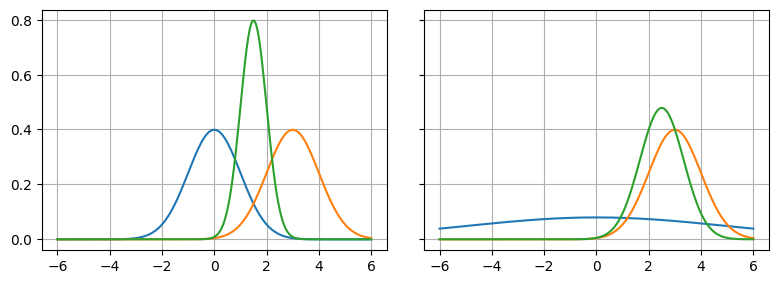

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import norm
y = np.array([3]); N = y.size; my = y.mean(); sy = 1.0; z = np.linspace(-6, 6, 200)
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True); fig.tight_layout()
ax = axs[0]; ax.grid(); m0 = 0; s0 = 1; sN = s0*sy/(sy+N*s0); mN = sN*(N*my/sy+m0/s0)
ax.plot(z, norm(m0, s0).pdf(z), z, norm(my, sy).pdf(z), z, norm(mN, sN).pdf(z))
ax = axs[1]; ax.grid(); m0 = 0; s0 = 5; sN = s0*sy/(sy+N*s0); mN = sN*(N*my/sy+m0/s0)
ax.plot(z, norm(m0, s0).pdf(z), z, norm(my, sy).pdf(z), z, norm(mN, sN).pdf(z));